# EDA for energy anomaly detection data
Data sourced from Kaggle competition: https://www.kaggle.com/competitions/energy-anomaly-detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import svm, preprocessing
from sklearn.impute import SimpleImputer
from sklearn import metrics
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


## Data structures

In [ ]:
df_train = pd.read_csv("../DATA/energy-anomaly-detection/train_features.csv")
df_weather = pd.read_csv("../DATA/energy-anomaly-detection/train.csv")
df_md = pd.read_csv("../DATA/energy-anomaly-detection/train.csv")
df_test =  pd.read_csv("../DATA/energy-anomaly-detection/test.csv")

building_id                        int64
timestamp                            str
meter_reading                    float64
anomaly                            int64
site_id                            int64
primary_use                          str
square_feet                        int64
year_built                         int64
floor_count                        int64
air_temperature                  float64
cloud_coverage                     int64
dew_temperature                  float64
precip_depth_1_hr                  int64
sea_level_pressure               float64
wind_direction                     int64
wind_speed                       float64
air_temperature_mean_lag7        float64
air_temperature_max_lag7         float64
air_temperature_min_lag7         float64
air_temperature_std_lag7         float64
air_temperature_mean_lag73       float64
air_temperature_max_lag73        float64
air_temperature_min_lag73        float64
air_temperature_std_lag73        float64
hour            

In [4]:
df_train.describe()

,building_id,meter_reading,anomaly,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
count,1.749494e+06,1.641841e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,...,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06
mean,7.908894e+02,1.799018e+02,2.131816e-02,7.819728e+00,1.065658e+05,1.925582e+02,1.002549e+00,1.650747e+01,1.169304e+02,8.809186e+00,...,4.116000e+00,4.116496e+00,4.116366e+00,4.115904e+00,4.315819e+00,4.205350e+00,4.261428e+00,4.315266e+00,4.315661e+00,4.314160e+00
std,4.118085e+02,3.959129e+02,1.444428e-01,4.830006e+00,1.025531e+05,8.934352e+01,2.237710e+00,1.032373e+01,1.263866e+02,9.871421e+00,...,8.881787e-16,1.172369e-01,7.456097e-02,4.426736e-02,1.360274e+00,3.888381e-01,6.918509e-01,1.380285e+00,1.365402e+00,1.367109e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.980000e+02,0.000000e+00,0.000000e+00,-2.990000e+01,0.000000e+00,-3.600000e+01,...,4.116000e+00,3.942000e+00,3.989000e+00,4.056000e+00,4.370000e-01,1.556000e+00,2.670000e+00,4.070000e-01,4.030000e-01,4.300000e-02
25%,3.450000e+02,3.000000e+01,0.000000e+00,3.000000e+00,3.182900e+04,8.200000e+01,0.000000e+00,9.100000e+00,0.000000e+00,2.000000e+00,...,4.116000e+00,4.009000e+00,4.012000e+00,4.078000e+00,3.537000e+00,4.211000e+00,4.090000e+00,3.522000e+00,3.539000e+00,3.536000e+00
50%,8.960000e+02,8.410000e+01,0.000000e+00,9.000000e+00,7.108800e+04,2.550000e+02,0.000000e+00,1.670000e+01,4.000000e+00,9.700000e+00,...,4.116000e+00,4.138000e+00,4.147000e+00,4.102000e+00,4.442000e+00,4.211000e+00,4.548000e+00,4.395000e+00,4.406000e+00,4.410000e+00
75%,1.147000e+03,1.990000e+02,0.000000e+00,1.300000e+01,1.383160e+05,2.550000e+02,0.000000e+00,2.440000e+01,2.550000e+02,1.670000e+01,...,4.116000e+00,4.244000e+00,4.173000e+00,4.162000e+00,5.238000e+00,4.489000e+00,4.662000e+00,5.270000e+00,5.238000e+00,5.262000e+00
max,1.353000e+03,6.596890e+03,1.000000e+00,1.500000e+01,4.843760e+05,2.550000e+02,1.200000e+01,4.720000e+01,2.550000e+02,2.610000e+01,...,4.116000e+00,4.265000e+00,4.176000e+00,4.186000e+00,8.424000e+00,4.891000e+00,7.270000e+00,8.576000e+00,8.493000e+00,8.458000e+00


## EDA


### Correlation

In [8]:
# Calculate the full correlation matrix
pearson_corr = df_train.select_dtypes(include=['int64', 'float64']).corr(method='spearman')

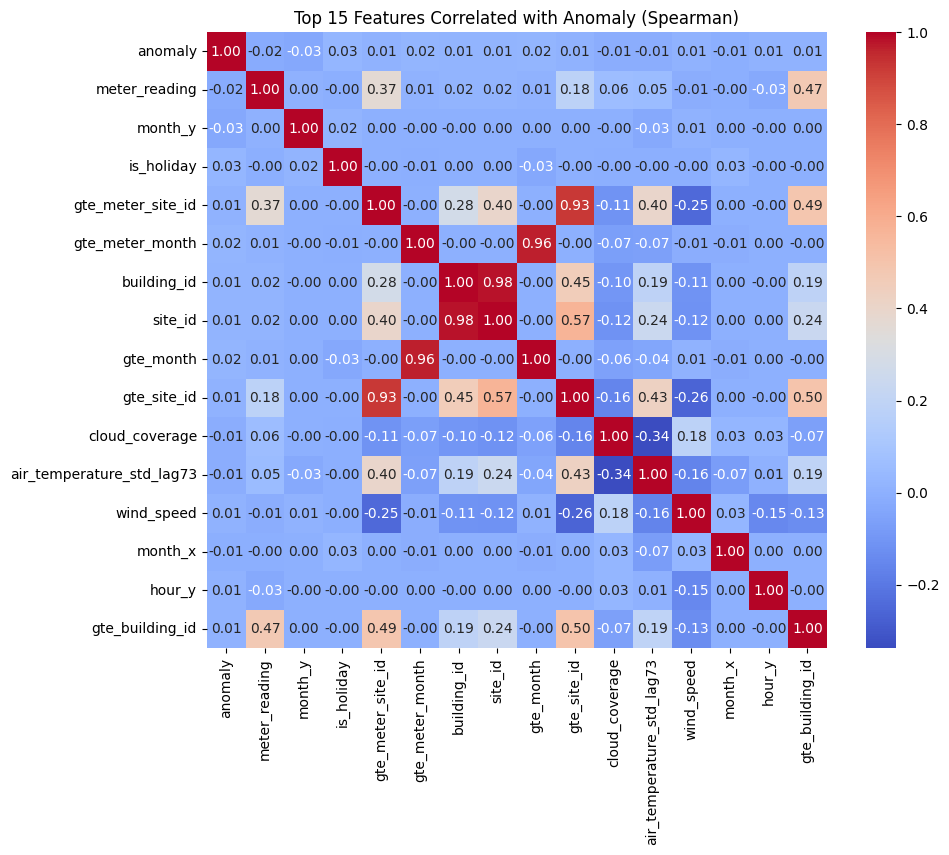

In [9]:
top_10_corr = pearson_corr['anomaly'].abs().sort_values(ascending=False).head(16) # head(11) because "anomaly" will be 1.0 with itself
top_features = top_10_corr.index
filtered_corr = df_train[top_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 15 Features Correlated with Anomaly (Spearman)")
plt.show()

### Chi-square test (independence)